In [2]:
import pandas as pd

df = pd.read_csv("my_dota_stats.csv")

In [3]:
df.columns

Index(['match_id', 'date', 'hero_id', 'won', 'team', 'duration_minutes',
       'game_mode', 'kills', 'deaths', 'assists', 'kda', 'level',
       'gold_per_min', 'xp_per_min', 'net_worth', 'last_hits', 'denies',
       'hero_damage', 'tower_damage', 'hero_healing', 'lane_efficiency',
       'teamfight_participation', 'item_0', 'item_1', 'item_2', 'item_3',
       'item_4', 'item_5', 'hero_name'],
      dtype='str')

In [24]:
df = df[['hero_name', 'team', 'won', 'kills', 'deaths', 'assists', 'last_hits', 'denies', 'duration_minutes', 'gold_per_min', 'xp_per_min', 'hero_damage','tower_damage', 'hero_healing']]
df_numerical = df[['kills', 'deaths', 'assists', 'last_hits', 'denies', 'duration_minutes', 'gold_per_min', 'xp_per_min', 'hero_damage','tower_damage', 'hero_healing']]

In [25]:
df.head()

,hero_name,team,won,kills,deaths,assists,last_hits,denies,duration_minutes,gold_per_min,xp_per_min,hero_damage,tower_damage,hero_healing
0,Puck,Radiant,0,12,7,8,251,9,42.8,574,909,49922,652,0
1,Enigma,Radiant,0,7,8,18,242,19,49.6,465,618,58265,4377,3361
2,Invoker,Dire,0,9,7,26,245,23,51.5,531,608,51051,2332,0
3,Puck,Radiant,0,9,7,10,291,9,43.8,507,782,39642,1233,0
4,Nature's Prophet,Radiant,1,6,3,18,191,12,27.9,618,581,17770,9460,1033


In [26]:
df_numerical.describe()

,kills,deaths,assists,last_hits,denies,duration_minutes,gold_per_min,xp_per_min,hero_damage,tower_damage,hero_healing
count,199.000000,199.000000,199.000000,199.000000,199.00000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,8.974874,8.557789,18.286432,198.100503,9.20603,44.975377,476.306533,692.683417,33039.492462,2674.889447,607.115578
std,5.511638,3.582424,8.608979,122.977209,6.67823,10.134482,132.693356,228.147979,16420.912312,3570.445177,1868.626872
min,0.000000,0.000000,0.000000,9.000000,0.00000,24.400000,130.000000,186.000000,3205.000000,0.000000,0.000000
25%,5.000000,6.000000,12.000000,107.500000,4.00000,38.200000,387.500000,550.000000,20185.000000,235.000000,0.000000
50%,9.000000,8.000000,18.000000,190.000000,8.00000,43.500000,462.000000,668.000000,30022.000000,1190.000000,0.000000
75%,12.000000,11.000000,23.500000,261.000000,12.00000,51.300000,559.000000,852.500000,44292.500000,3327.500000,0.000000
max,25.000000,20.000000,51.000000,796.000000,33.00000,88.200000,883.000000,1378.000000,86394.000000,19962.000000,19849.000000


In [27]:
df.dtypes

hero_name               str
team                    str
won                   int64
kills                 int64
deaths                int64
assists               int64
last_hits             int64
denies                int64
duration_minutes    float64
gold_per_min          int64
xp_per_min            int64
hero_damage           int64
tower_damage          int64
hero_healing          int64
dtype: object

In [47]:
# Select only numeric columns
numeric_cols = df_numerical.columns

# Compute descriptive statistics
stats_table = df_numerical.agg(['mean','median','std','min','max']).T
stats_table['range'] = stats_table['max'] - stats_table['min']

# Compute skewness and kurtosis
stats_table['skewness'] = df_numerical[numeric_cols].skew()
stats_table['kurtosis'] = df_numerical[numeric_cols].kurtosis()

# Keep only relevant columns
stats_table = stats_table[['mean','median','std','range','skewness','kurtosis']].round(2)

stats_table

,mean,median,std,range,skewness,kurtosis
kills,8.97,9.0,5.51,25.0,0.78,0.44
deaths,8.56,8.0,3.58,20.0,0.33,-0.08
assists,18.29,18.0,8.61,51.0,0.44,0.39
last_hits,198.10,190.0,122.98,787.0,1.43,3.81
denies,9.21,8.0,6.68,33.0,1.12,1.33
duration_minutes,44.98,43.5,10.13,63.8,0.78,1.10
gold_per_min,476.31,462.0,132.69,753.0,0.26,-0.06
xp_per_min,692.68,668.0,228.15,1192.0,0.27,-0.18
hero_damage,33039.49,30022.0,16420.91,83189.0,0.66,0.15
tower_damage,2674.89,1190.0,3570.45,19962.0,2.06,4.52


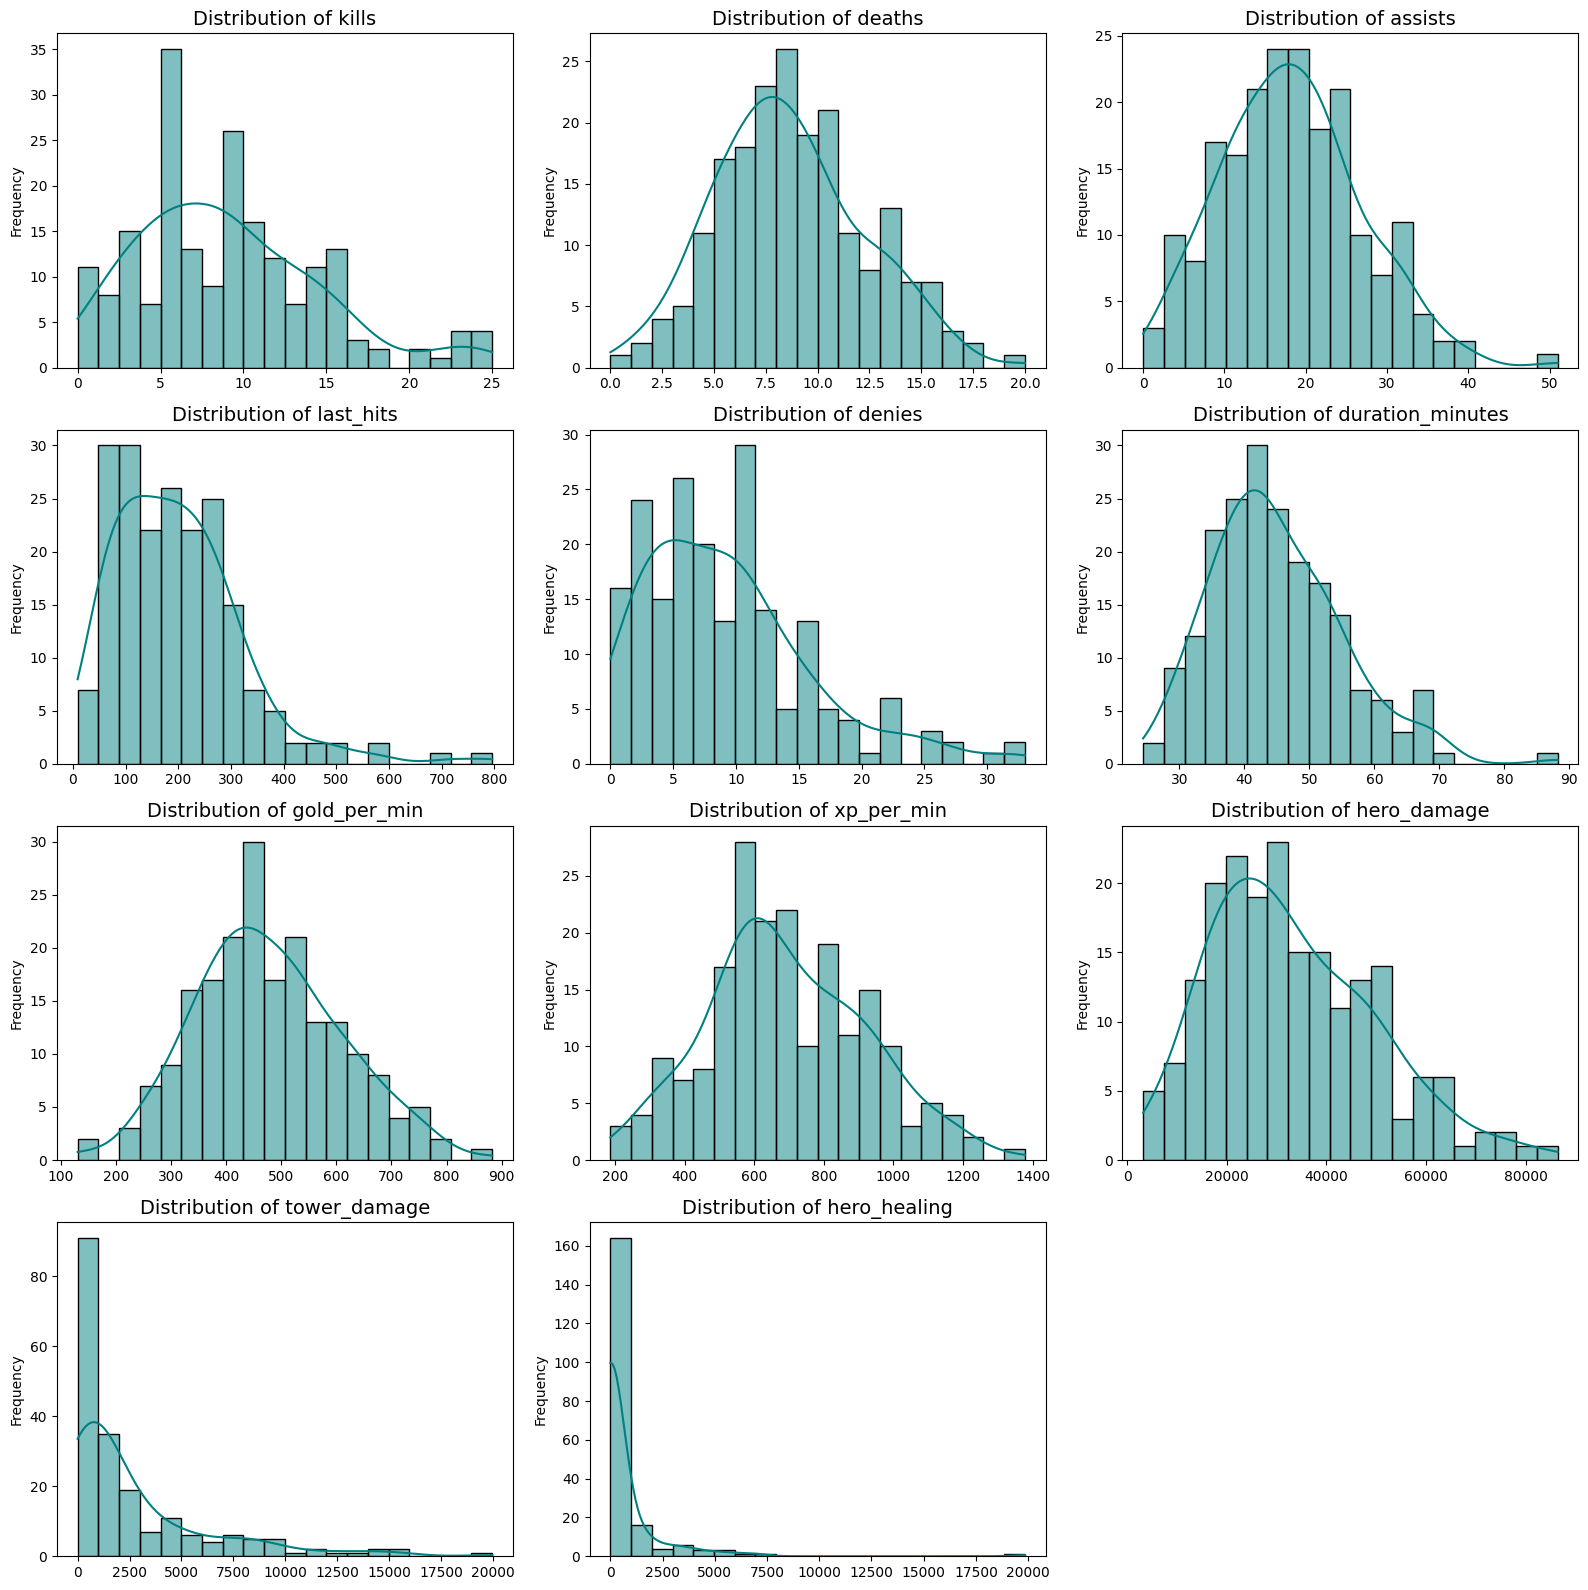

            kills      deaths     assists   last_hits     denies  \
count  199.000000  199.000000  199.000000  199.000000  199.00000   
mean     8.974874    8.557789   18.286432  198.100503    9.20603   
std      5.511638    3.582424    8.608979  122.977209    6.67823   
min      0.000000    0.000000    0.000000    9.000000    0.00000   
25%      5.000000    6.000000   12.000000  107.500000    4.00000   
50%      9.000000    8.000000   18.000000  190.000000    8.00000   
75%     12.000000   11.000000   23.500000  261.000000   12.00000   
max     25.000000   20.000000   51.000000  796.000000   33.00000   

       duration_minutes  gold_per_min   xp_per_min   hero_damage  \
count        199.000000    199.000000   199.000000    199.000000   
mean          44.975377    476.306533   692.683417  33039.492462   
std           10.134482    132.693356   228.147979  16420.912312   
min           24.400000    130.000000   186.000000   3205.000000   
25%           38.200000    387.500000   550.000

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data


# 2. Filter for numeric columns only (Kills, Deaths, GPM, etc.)
# We exclude 'match_id' and 'hero_id' because their distributions aren't meaningful
numeric_cols = df_numerical.columns
cols_to_plot = [col for col in numeric_cols if 'id' not in col.lower()]

# 3. Create the grid
num_plots = len(cols_to_plot)
rows = (num_plots + 2) // 3  # Arrange in 3 columns
fig, axes = plt.subplots(rows, 3, figsize=(16, 4 * rows))
axes = axes.flatten()

# 4. Loop through and plot
for i, col in enumerate(cols_to_plot):
    sns.histplot(df[col], kde=True, ax=axes[i], color='teal', bins=20)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots in the grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 5. Display the raw numbers (Mean, Std Dev, Min, Max)
print(df[cols_to_plot].describe())

Winning Factors

In [71]:
import pandas as pd
from scipy.stats import pearsonr

# Ensure binary target
if df['won'].dtype == 'bool' or df['won'].dtype == 'object':
    df['won'] = df['won'].astype(int)

# Select numeric columns
numeric_df = df.select_dtypes(include=['number']).drop(
    columns=[col for col in df.columns if 'id' in col.lower()], errors='ignore'
)

results = []

for col in numeric_df.columns:
    if col != 'won':
        r, p = pearsonr(numeric_df[col], numeric_df['won'])
        results.append([col, r, p])

corr_table = pd.DataFrame(results, columns=['Variable','r','p'])

# significance symbols
def sig(p):
    if p < 0.001: return '***'
    if p < 0.01: return '**'
    if p < 0.05: return '*'
    return 'ns'

corr_table['Sig'] = corr_table['p'].apply(sig)

# sort strongest to weakest
corr_table = corr_table.sort_values(by='r', ascending=False)

corr_table.round(4)

,Variable,r,p,Sig
2,assists,0.4426,0.0000,***
9,tower_damage,0.4245,0.0000,***
7,xp_per_min,0.3860,0.0000,***
6,gold_per_min,0.3765,0.0000,***
0,kills,0.3338,0.0000,***
8,hero_damage,0.1363,0.0549,ns
10,hero_healing,0.0899,0.2068,ns
5,duration_minutes,0.0201,0.7777,ns
3,last_hits,-0.0096,0.8925,ns
4,denies,-0.0583,0.4138,ns


C:\Users\Migs\AppData\Local\Temp\ipykernel_5868\1159228348.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=correlations.values, y=correlations.index, palette=colors)


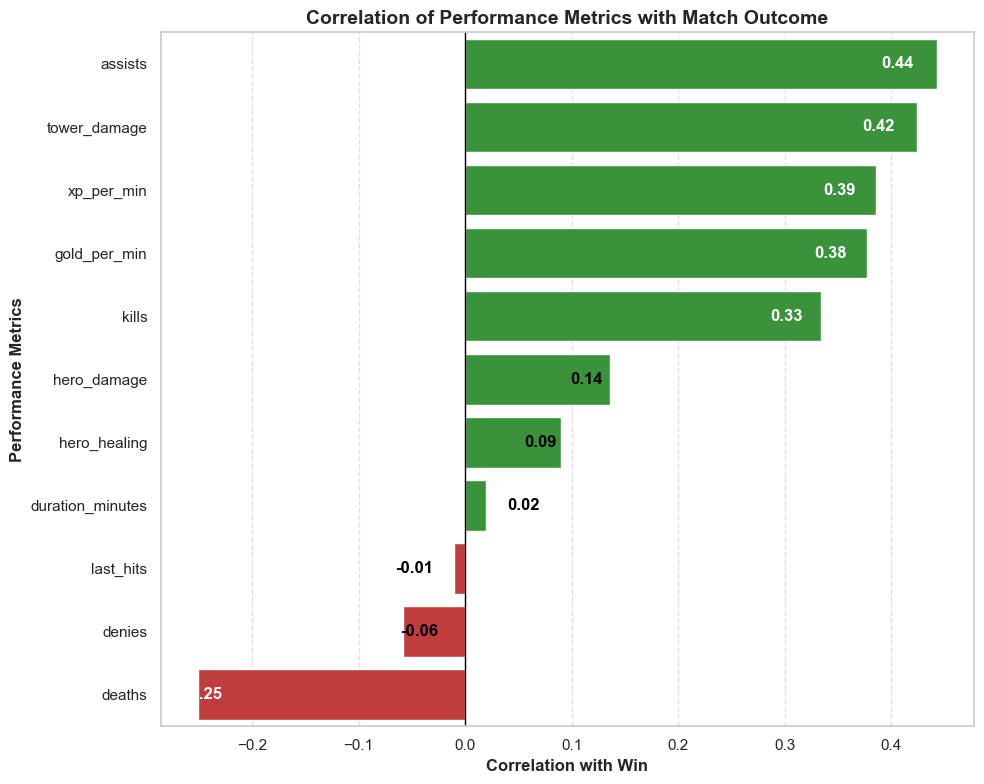

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure seaborn style
sns.set(style="whitegrid")

# Metrics and correlations (already computed)
# correlations = numeric_df.corr()['won'].drop('won').sort_values(ascending=False).round(3)

plt.figure(figsize=(10, 8))

# Color map: green for positive, red for negative
colors = ['#2ca02c' if x > 0 else '#d62728' for x in correlations]

# Create bar plot
bars = sns.barplot(x=correlations.values, y=correlations.index, palette=colors)

# Add values on bars
for bar, value in zip(bars.patches, correlations.values):
    width = bar.get_width()
    if abs(value) >= 0.05:
        ha = 'right' if value > 0 else 'left'
        x_pos = width * 0.95 if value > 0 else width * 1.05
        bars.text(x_pos, bar.get_y() + bar.get_height()/2, f"{value:.2f}",
                  ha=ha, va='center', color='white' if abs(value) >= 0.2 else 'black', fontweight='bold')
    else:
        # For tiny correlations, put just outside
        x_pos = width + 0.02 if value > 0 else width - 0.02
        bars.text(x_pos, bar.get_y() + bar.get_height()/2, f"{value:.2f}",
                  ha='left' if value > 0 else 'right', va='center', color='black', fontweight='bold')

# Labels, title, and grid
plt.xlabel('Correlation with Win', fontsize=12, fontweight='bold')
plt.ylabel('Performance Metrics', fontsize=12, fontweight='bold')
plt.title('Correlation of Performance Metrics with Match Outcome', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('win_correlation_polished.png', dpi=300)
plt.show()

impact or consistency

In [54]:
import pandas as pd

metrics = ['assists','tower_damage','xp_per_min','gold_per_min','kills']

consistency = pd.DataFrame({
    'Mean': df[metrics].mean(),
    'SD': df[metrics].std(),
    'CV': (df[metrics].std() / df[metrics].mean())
})

consistency

,Mean,SD,CV
assists,18.286432,8.608979,0.470785
tower_damage,2674.889447,3570.445177,1.334801
xp_per_min,692.683417,228.147979,0.329368
gold_per_min,476.306533,132.693356,0.278588
kills,8.974874,5.511638,0.614119


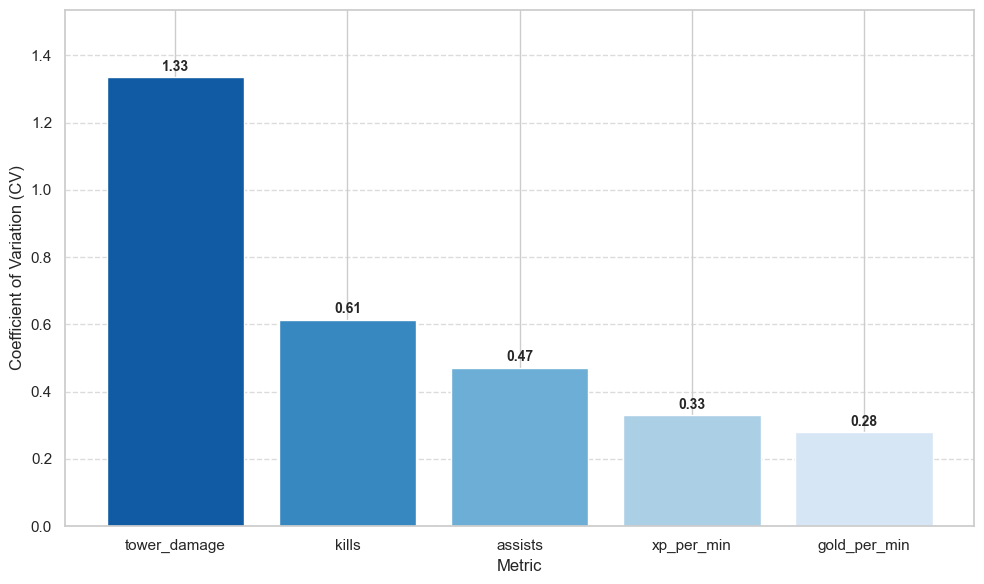

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics and CV calculation
metrics = ['assists','tower_damage','xp_per_min','gold_per_min','kills']
cv = df[metrics].std() / df[metrics].mean()
cv = cv.sort_values(ascending=False)

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(cv.index, cv.values, color=sns.color_palette("Blues_r", len(cv)))

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Labels and title
plt.ylabel('Coefficient of Variation (CV)', fontsize=12)
plt.xlabel('Metric', fontsize=12)

plt.ylim(0, max(cv.values) + 0.2)  # Add space for labels
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Optimal Hero Selection for Dota 2

C:\Users\Migs\AppData\Local\Temp\ipykernel_5868\967311204.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5.index, y=top_5['win_rate'], palette="viridis")


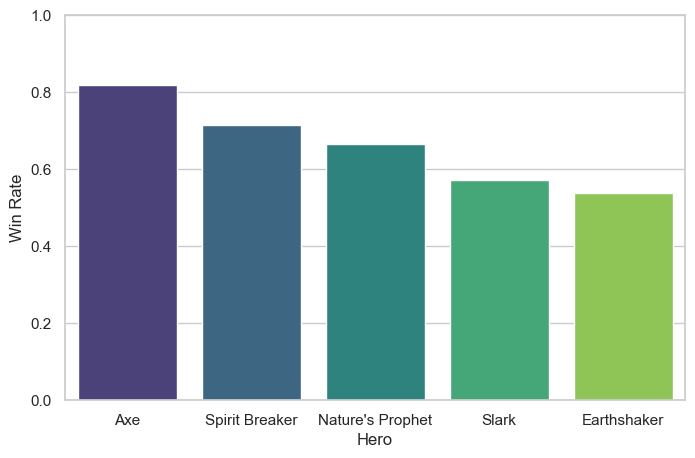

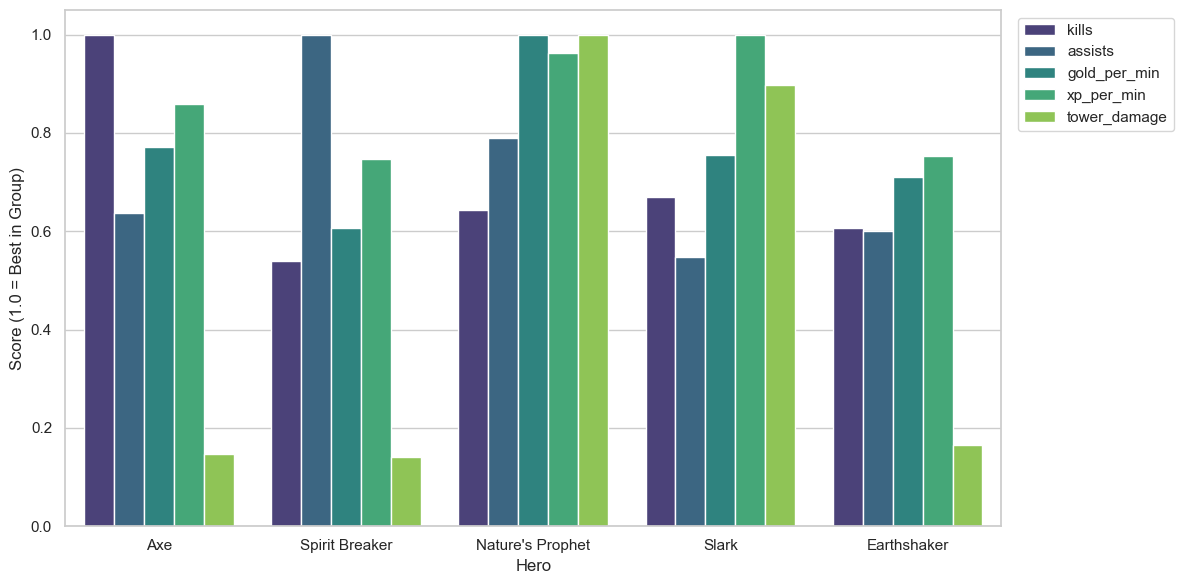

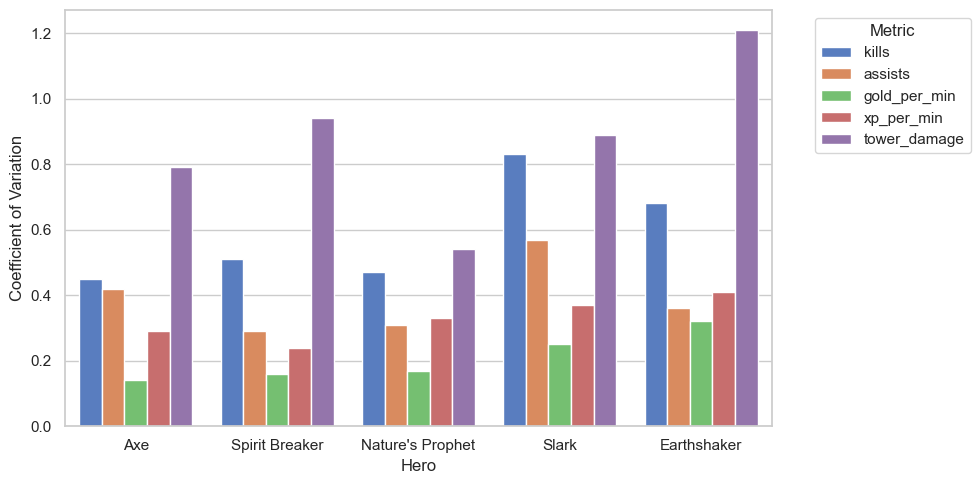

In [161]:

# Step 1: compute basic stats
hero_stats = df.groupby('hero_name')['won'].agg(['mean','count']).rename(columns={'mean':'win_rate','count':'matches'})

# Step 2: first filter by minimum matches
hero_stats_filtered = hero_stats[hero_stats['matches'] >= 5].copy()

# Step 3: compute SE only on filtered heroes
hero_stats_filtered['SE'] = (hero_stats_filtered['win_rate'] * (1 - hero_stats_filtered['win_rate']) / hero_stats_filtered['matches']) ** 0.5

# Step 4: optional further filter by SE if desired
heroes_to_use = hero_stats_filtered[hero_stats_filtered['SE'] <= 0.2].index

# Step 5: filter the main df
df_filtered = df[df['hero_name'].isin(heroes_to_use)]

# Filter stats, perf, and CV consistently
metrics = ['kills','assists','gold_per_min','xp_per_min','tower_damage']

# Only use heroes_to_use
df_filtered = df[df['hero_name'].isin(heroes_to_use)]

# Recompute all stats from df_filtered
hero_stats_filtered = df_filtered.groupby('hero_name')['won'].agg(['mean','count']).rename(columns={'mean':'win_rate','count':'matches'})
hero_stats_filtered['SE'] = (hero_stats_filtered['win_rate'] * (1 - hero_stats_filtered['win_rate']) / hero_stats_filtered['matches']) ** 0.5

hero_perf = df_filtered.groupby('hero_name')[metrics].mean().round(2)
hero_cv = (df_filtered.groupby('hero_name')[metrics].std() / df_filtered.groupby('hero_name')[metrics].mean()).round(2)
hero_cv.columns = [col + '_CV' for col in hero_cv.columns]

# Now join safely
hero_summary = hero_stats_filtered.join(hero_perf).join(hero_cv)

hero_summary.head()

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
sns.set(style="whitegrid")

# ---------- Step 1: Top 5 heroes by win rate ----------
top_5 = hero_summary.sort_values(by='win_rate', ascending=False).head(5)

# ---------- Chart 1: Top 5 Heroes by Win Rate ----------
plt.figure(figsize=(8,5))
sns.barplot(x=top_5.index, y=top_5['win_rate'], palette="viridis")

plt.ylabel("Win Rate")
plt.ylim(0, 1)
plt.xlabel("Hero")
plt.show()

# ---------- Chart 2: Normalized Performance Metrics per Hero ----------
metrics = ['kills','assists','gold_per_min','xp_per_min','tower_damage']

# Normalize per hero (row-wise) to avoid domination by one metric
top_5_perf_norm = top_5[metrics] / top_5[metrics].max()

# Melt for Seaborn
df_perf_melt = top_5_perf_norm.reset_index().melt(
    id_vars='hero_name',
    value_vars=metrics,
    var_name='Metric',
    value_name='Relative Score'
)


plt.figure(figsize=(12,6))
sns.barplot(
    data=df_perf_melt,
    x='hero_name',
    y='Relative Score',
    hue='Metric',
    palette='viridis'
)


plt.ylabel("Score (1.0 = Best in Group)")
plt.xlabel("Hero")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ---------- Chart 3: Performance Consistency (CV) ----------
cv_metrics = [m+'_CV' for m in metrics]
top_5_cv = top_5[cv_metrics]

# Melt for Seaborn
df_cv_melt = top_5_cv.reset_index().melt(id_vars='hero_name', value_vars=cv_metrics,
                                         var_name='Metric', value_name='CV')
# Clean metric names
df_cv_melt['Metric'] = df_cv_melt['Metric'].str.replace('_CV','')

plt.figure(figsize=(10,5))
sns.barplot(data=df_cv_melt, x='hero_name', y='CV', hue='Metric', palette='muted')

plt.ylabel("Coefficient of Variation")
plt.xlabel("Hero")
plt.xticks(rotation=0)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Side Diffrence

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you have a 'side' column. If you have 'is_radiant', convert it:
if 'is_radiant' in df.columns:
    df['side'] = df['is_radiant'].map({True: 'Radiant', False: 'Dire'})

# --- Step 1: Calculate Win Rates ---
side_stats = df.groupby('side')['won'].agg(['mean', 'count']).rename(columns={'mean': 'win_rate', 'count': 'matches'})
print("Win Rates by Side:\n", side_stats)

# --- Step 2: Statistical Significance (Chi-Square Test) ---
# Create a "Contingency Table" of wins vs losses
contingency_table = pd.crosstab(df['side'], df['won'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\nChi-Square Test Results:")
print(f"P-Value: {p_value:.5f}")
if p_value < 0.05:
    print("RESULT: Statistically Significant! One side has a distinct advantage.")
else:
    print("RESULT: No significant advantage. The map is balanced.")

# --- Visualization: Win Rate with Confidence Intervals ---
plt.figure(figsize=(6, 5))
sns.barplot(x='side', y='won', data=df, palette='coolwarm', capsize=0.1)
plt.title(f'Win Rate by Side (p={p_value:.3f})')
plt.ylabel('Win Rate')
plt.ylim(0, 1)
plt.show()

Performance on duration

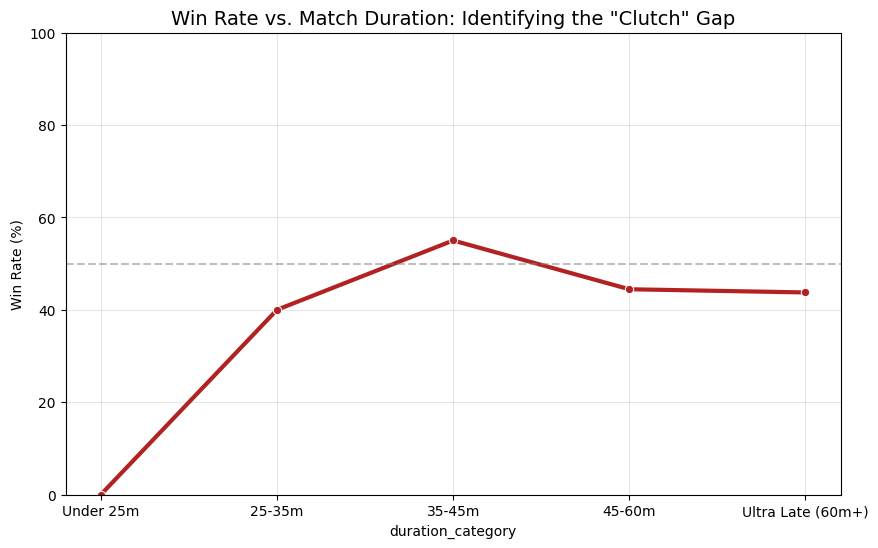

duration_category
Under 25m             0.000000
25-35m               40.000000
35-45m               55.000000
45-60m               44.444444
Ultra Late (60m+)    43.750000
Name: won, dtype: float64


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv('my_dota_stats.csv')

# 2. Create Duration Bins (e.g., every 10 minutes)
bins = [0, 25, 35, 45, 60, 120]
labels = ['Under 25m', '25-35m', '35-45m', '45-60m', 'Ultra Late (60m+)']
df['duration_category'] = pd.cut(df['duration_minutes'], bins=bins, labels=labels)

# 3. Calculate Win Rate for each category
win_rate_by_time = df.groupby('duration_category')['won'].mean() * 100

# 4. Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=win_rate_by_time.index, y=win_rate_by_time.values, marker='o', color='firebrick', linewidth=3)
plt.axhline(50, color='gray', linestyle='--', alpha=0.5) # The 50% Win Rate line

plt.title('Win Rate vs. Match Duration: Identifying the "Clutch" Gap', fontsize=14)
plt.ylabel('Win Rate (%)')
plt.ylim(0, 100)
plt.grid(True, alpha=0.3)
plt.show()

print(win_rate_by_time)